___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 9<br><br>RNN Syntax Basics<br><br>Sine Wave<br><h1>

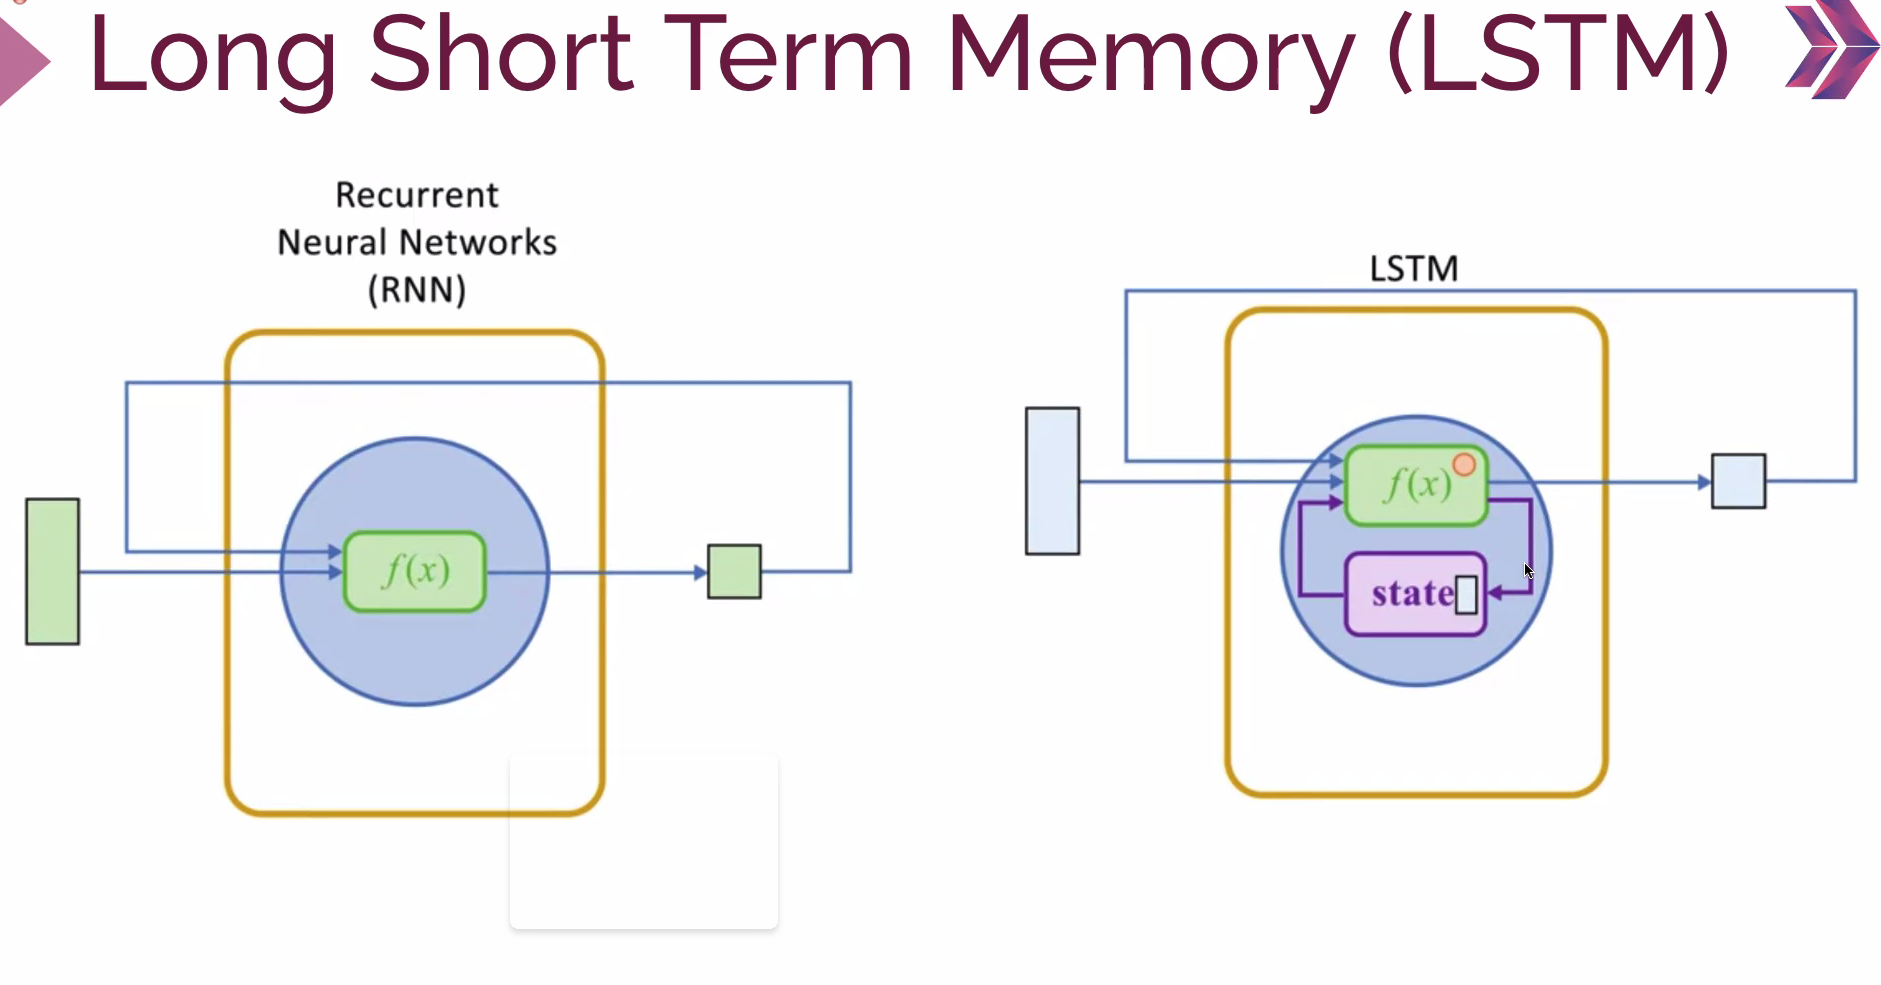

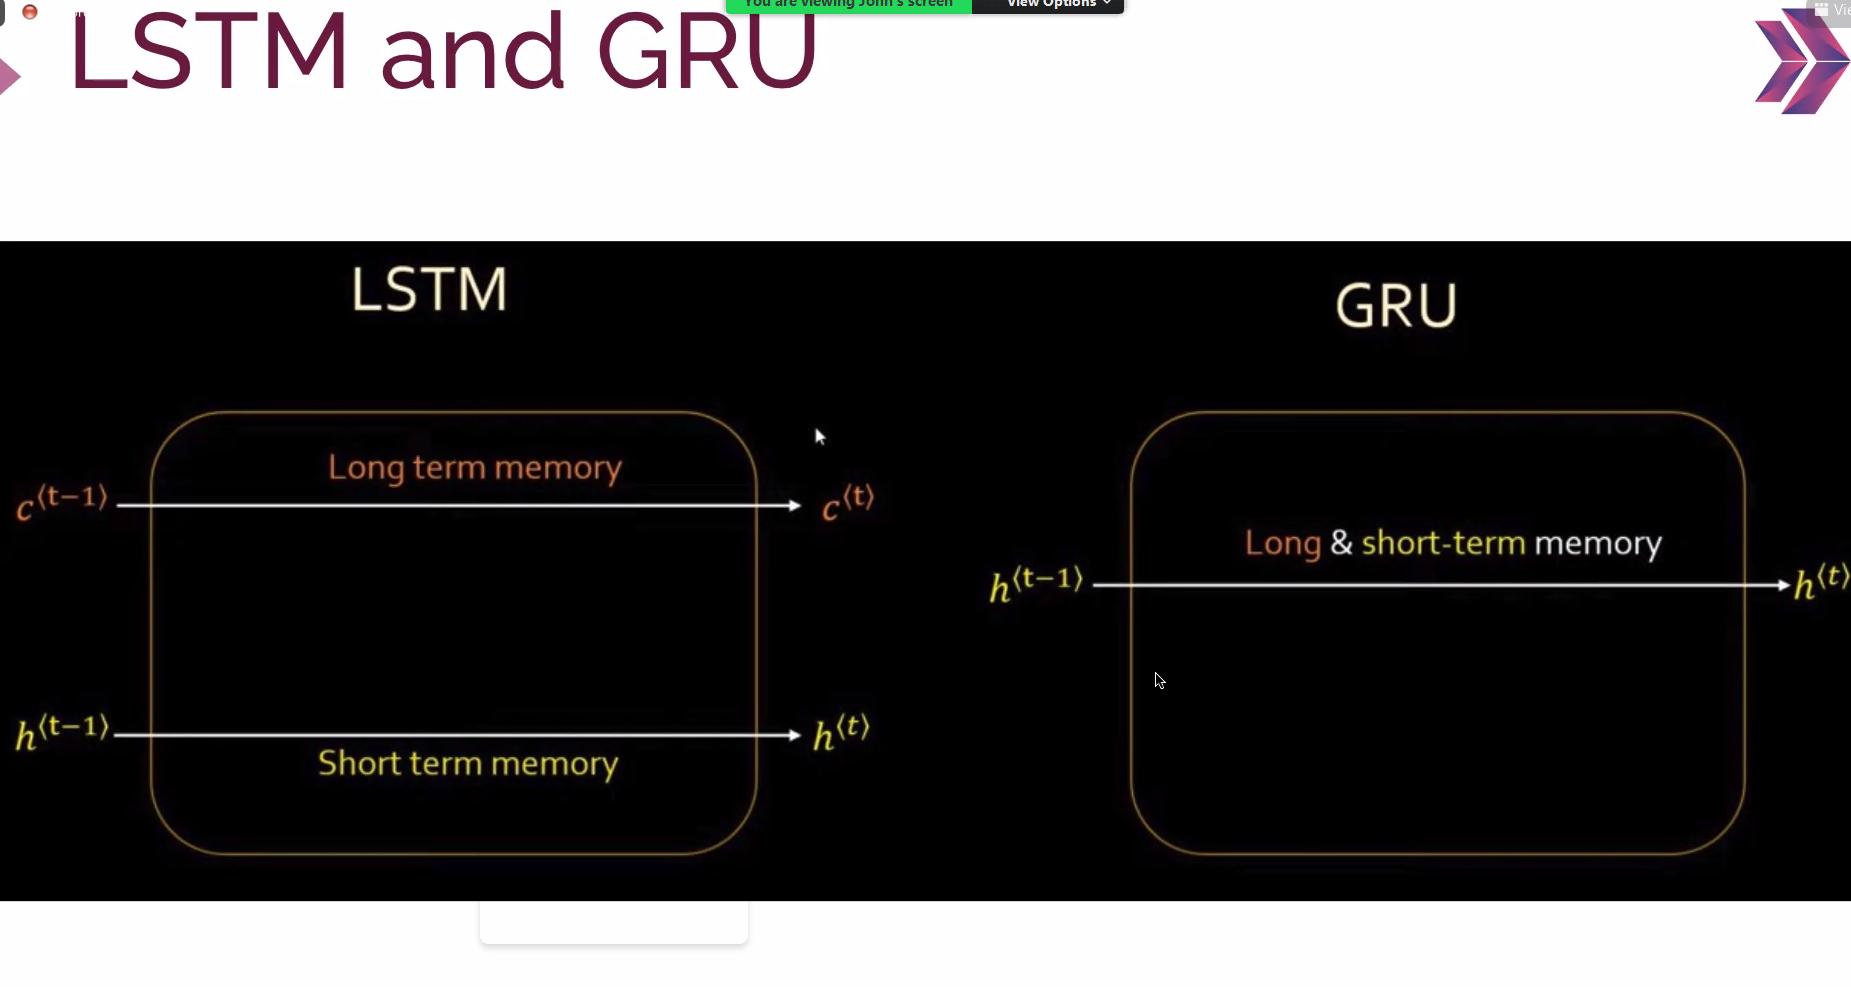

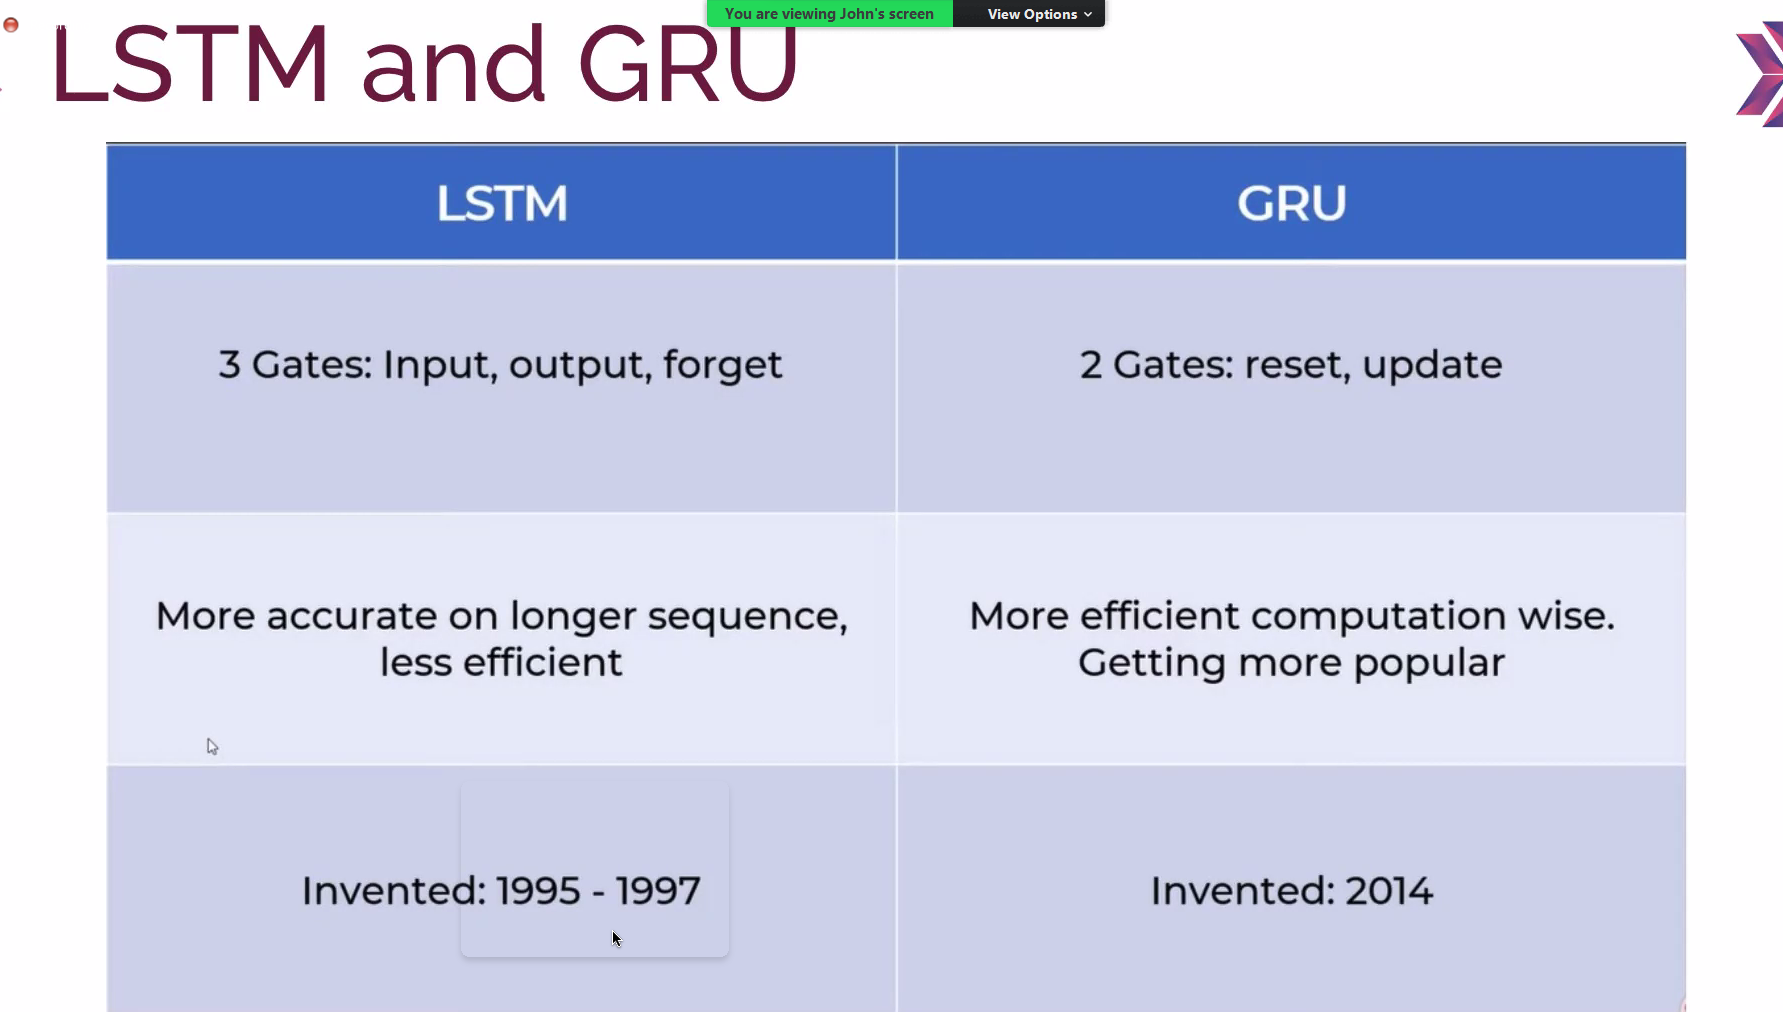

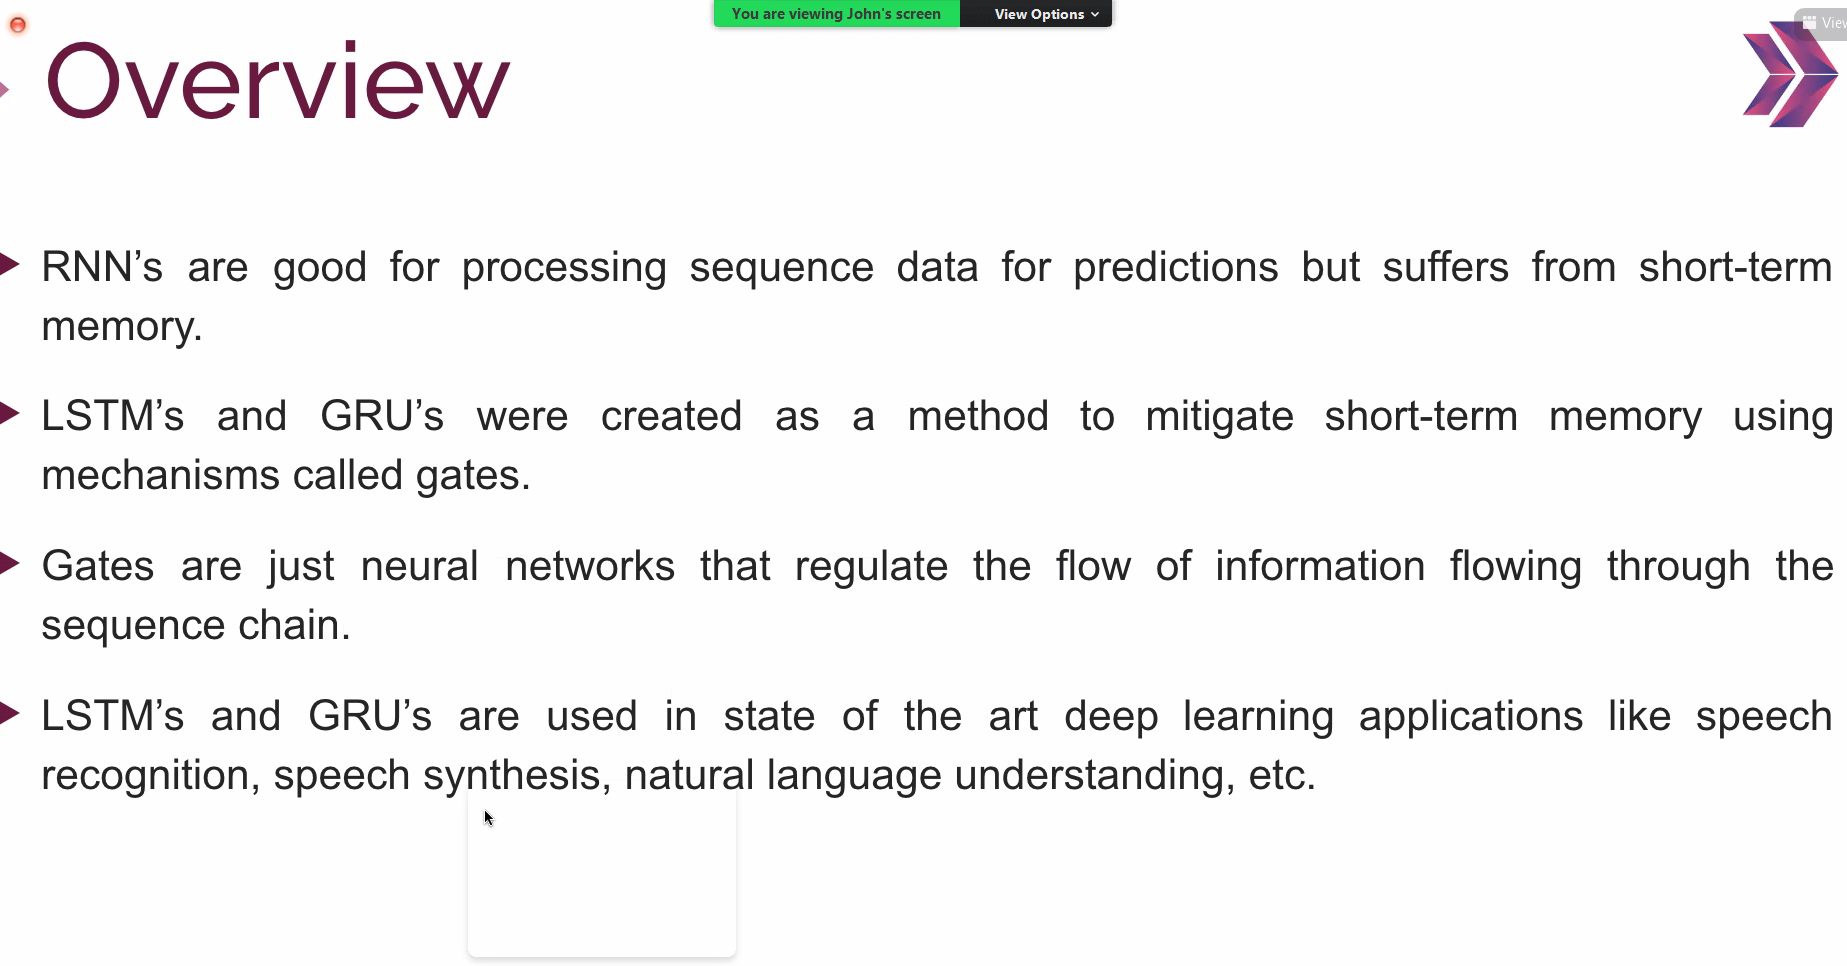

# Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
x = np.linspace(0,50,501) # kendimiz data olusutruduk
y = np.sin(x)             # x degerlerinin sinüsü

# bir sinüs datası oluşturdum. sonuçta sinüs datası birbirini tekrar edecek
# bunun için linspace ile 0 ile 50 arasında 501 tane sayı oluşturdum.
# y değerleri de bunların sin() değerleri oldu.

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

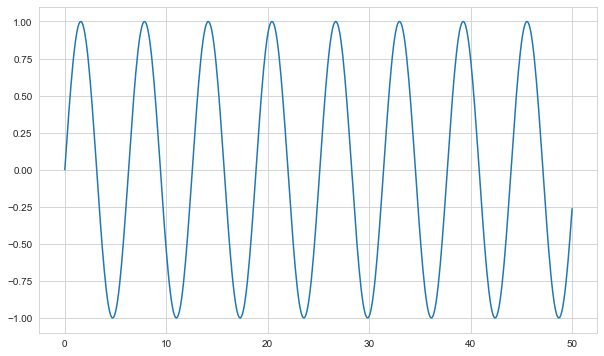

In [5]:
plt.plot(x,y)

# sin -1 ile 1 arasinda. sinüs verisi sequence veri

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])  

# datası sinüs değelerinden oluşan bir dataframe oluşturduk.

In [7]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


# Preprocessing of Data

## Train Test Split

In [8]:
len(df)  

501

In [9]:
test_percent = 0.15 #datamin sirasi önemli 
# test datasi olarak sira bozulmadan random olarak degil, belirli bir kismini aliyoruz.
# son 75 satir --> test

In [10]:
len(df)*test_percent

75.14999999999999

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

In [12]:
test_ind = int(len(df) - test_point) # test baslangic indexi
test_ind

426

In [13]:
train = df.iloc[:test_ind]  #0-425
test = df.iloc[test_ind:]   #426-501    
# Train datamizin son kismi test datamizin baslangici olmakta

In [14]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [15]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

# datam -1 ile 1 arasinda, biz onu 0 ile 1 arasina scale ettik

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
#help(TimeseriesGenerator)

In [28]:
# define generator
length = 3 # Length of the output sequences (in number of timesteps) # # Çıkış dizilerinin uzunluğu (zaman adımı sayısı olarak)
batch_size = 1 # Number of timeseries samples in each batch # # Her partideki zaman serisi örneklerinin sayısı
stride = 1 # Period between successive output sequences # Ardışık çıktı dizileri arasındaki süre
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,  
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

# data ve target a ayni seyi verdik.
# x trainim de y trainim de aynı yerde (tahmin edeceğim (target) ve train edeceğim datam aynı yerde) 
# o yüzden data ile targets parametreleri aynı (train_scaled)


In [29]:
len(train_scaled)

426

In [30]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

# train_scaled 426 satırdı fakat generator bana 423 adet data üretmiş. 
# çünkü benim sequence uzunluğum (lenght parametresi)=3 
# eğitim yaparken kaydırmayı 1 adımda yaptığı için 3 değer kayıp oldu.

423

In [31]:
generator

In [32]:
train_scaled[0:6]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381]])

In [33]:
generator[105]

(array([[[0.06014771],
         [0.0386077 ],
         [0.02167777]]]),
 array([[0.00952706]]))

In [34]:
train_scaled[-6:]

array([[4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03]])

In [35]:
# What does the first batch look like?
X, y = generator[0]


In [36]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458]]])

In [37]:
y

array([[0.64776041]])

In [38]:
generator[0]

(array([[[0.49999912],
         [0.54991622],
         [0.59933458]]]),
 array([[0.64776041]]))

In [39]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]
  [0.59933458]]]
Predict this y: 
[[0.64776041]]


In [40]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

<AxesSubplot:>

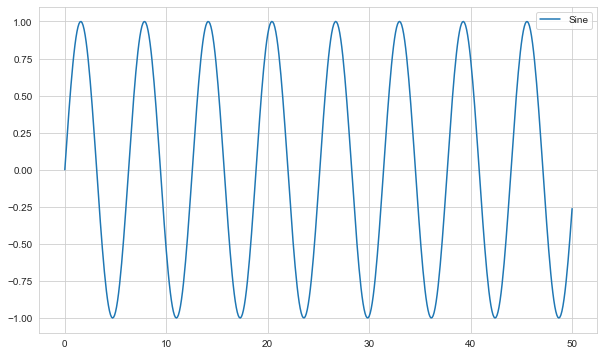

In [41]:
df.plot()

The more length the more training time

In [42]:
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

# tam bir kivrim 64. satira denk geliyor. 8 tepe noktasi var. --> 501 / 8 = 62,5 biz 64 aldik.

In [43]:
# What does the first batch look like?
X, y = generator[0]

In [44]:
generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

In [45]:
generator[361]

(array([[[1.95533568e-04],
         [1.27922981e-03],
         [7.34597031e-03],
         [1.83351382e-02],
         [3.41369333e-02],
         [5.45934694e-02],
         [7.95003514e-02],
         [1.08608718e-01],
         [1.41627728e-01],
         [1.78227467e-01],
         [2.18042242e-01],
         [2.60674236e-01],
         [3.05697486e-01],
         [3.52662133e-01],
         [4.01098922e-01],
         [4.50523890e-01],
         [5.00443198e-01],
         [5.50358069e-01],
         [5.99769769e-01],
         [6.48184595e-01],
         [6.95118799e-01],
         [7.40103433e-01],
         [7.82689024e-01],
         [8.22450070e-01],
         [8.58989293e-01],
         [8.91941605e-01],
         [9.20977757e-01],
         [9.45807630e-01],
         [9.66183132e-01],
         [9.81900676e-01],
         [9.92803220e-01],
         [9.98781828e-01],
         [9.99776764e-01],
         [9.95778087e-01],
         [9.86825751e-01],
         [9.73009203e-01],
         [9.54466495e-01],
 

In [46]:
train_scaled[-64:]

array([[1.27922981e-03],
       [7.34597031e-03],
       [1.83351382e-02],
       [3.41369333e-02],
       [5.45934694e-02],
       [7.95003514e-02],
       [1.08608718e-01],
       [1.41627728e-01],
       [1.78227467e-01],
       [2.18042242e-01],
       [2.60674236e-01],
       [3.05697486e-01],
       [3.52662133e-01],
       [4.01098922e-01],
       [4.50523890e-01],
       [5.00443198e-01],
       [5.50358069e-01],
       [5.99769769e-01],
       [6.48184595e-01],
       [6.95118799e-01],
       [7.40103433e-01],
       [7.82689024e-01],
       [8.22450070e-01],
       [8.58989293e-01],
       [8.91941605e-01],
       [9.20977757e-01],
       [9.45807630e-01],
       [9.66183132e-01],
       [9.81900676e-01],
       [9.92803220e-01],
       [9.98781828e-01],
       [9.99776764e-01],
       [9.95778087e-01],
       [9.86825751e-01],
       [9.73009203e-01],
       [9.54466495e-01],
       [9.31382900e-01],
       [9.03989060e-01],
       [8.72558686e-01],
       [8.37405820e-01],


In [47]:
len(generator)

# 426-64 = 362
# son 64 ü alamadi bilgi üretmeyecegi icin

362

In [48]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

# Modelling with Simple RNN

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [50]:
# We're only using one feature in our time series ### Zaman serimizde yalnızca bir özellik kullanıyoruz
n_features = 1

In [51]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features)))  #length = 64 

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

# units, nöron sayisini ifade ediyor.

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [53]:
# params = 1 * ((size_of_input + 1) * size_of_output + size_of_output^2)
1 * ((1+1)*100+(100**2))

10200

In [54]:
model.fit_generator(generator = generator, epochs = 5)

# bu datada deneme yanilma yoluyla 5 epoch a karar verilmisitr. 

Epoch 1/5
362/362 [==============================] - 4s 9ms/step - loss: 0.0207
Epoch 2/5
362/362 [==============================] - 3s 9ms/step - loss: 6.6525e-04
Epoch 3/5
362/362 [==============================] - 3s 9ms/step - loss: 8.6966e-04
Epoch 4/5
362/362 [==============================] - 2s 7ms/step - loss: 0.0017
Epoch 5/5
362/362 [==============================] - 2s 7ms/step - loss: 0.0014


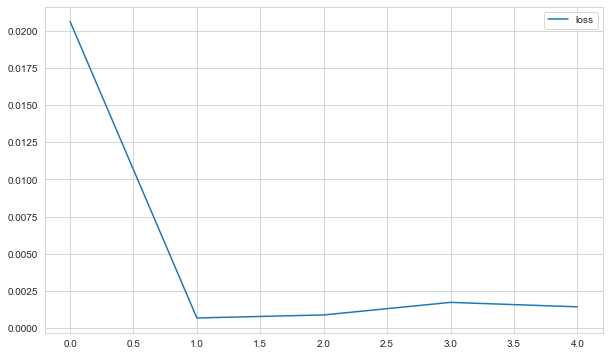

In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# Evaluation on Test Data

In [56]:
generator[0][0].shape

(1, 64, 1)

In [57]:
first_eval_batch = train_scaled[-length:]  #ilk degerlendirme batch

# train setimin son sequence ini yani son 64'ü veriyorum.

In [58]:
first_eval_batch.shape

(64, 1)

In [59]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
# first_eval_batch = np.expand_dims(first_eval_batch, axis=0)

# son batch i aldım ve bunu reshape yaparak modelimin benden beklediği formata getirdim.

In [60]:
first_eval_batch.shape #tahmin edebilir hale geldi.

(1, 64, 1)

In [61]:
model.predict(first_eval_batch) #test datamin ilk degeri ile kiyaslayacagiz.

1/1 [==============================] - 0s 224ms/step


array([[0.00777674]], dtype=float32)

In [62]:
test_scaled[0]

array([0.00885189])

In [63]:
test_scaled[74]

array([0.36881064])

In [64]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [65]:
current_batch.shape

(1, 64, 1)

In [66]:
current_batch # ikinci degerden basliyor.

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [67]:
np.append(current_batch[:,1:,:], [[[0.00670145]]], axis = 1)

# 0.00670145 benim ilk predict degerim

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

## Final For Loop to predict step by step 

In [68]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) #array in icindeki degeri alabilmek icin indeks kullandik.
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)
    
# yukarda 3 boyutlu array de bize kaç boyutlu eleman olduğunu gösteriyor.
# bizim datamızın olduğu yer current_batch[:, 1:, :] deki ortadaki bölüm (1: olan bölüm)
        

1/1 [==============================] - 0s 23ms/step


In [69]:
predictions_scaled

[array([0.00777674], dtype=float32),
 array([0.01960909], dtype=float32),
 array([0.03560141], dtype=float32),
 array([0.05643498], dtype=float32),
 array([0.08131387], dtype=float32),
 array([0.11064213], dtype=float32),
 array([0.14391091], dtype=float32),
 array([0.18112446], dtype=float32),
 array([0.22152078], dtype=float32),
 array([0.26507524], dtype=float32),
 array([0.31142208], dtype=float32),
 array([0.36022323], dtype=float32),
 array([0.4108622], dtype=float32),
 array([0.4625736], dtype=float32),
 array([0.5148875], dtype=float32),
 array([0.56751657], dtype=float32),
 array([0.619498], dtype=float32),
 array([0.6703888], dtype=float32),
 array([0.7193134], dtype=float32),
 array([0.7659519], dtype=float32),
 array([0.8096717], dtype=float32),
 array([0.8499732], dtype=float32),
 array([0.8863655], dtype=float32),
 array([0.91845524], dtype=float32),
 array([0.94595665], dtype=float32),
 array([0.9687125], dtype=float32),
 array([0.9862414], dtype=float32),
 array([0.9987

In [70]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformation and Comparing

In [71]:
predictions = scaler.inverse_transform(predictions_scaled) 
# scale edilmeden önceki hale (yani gercek degere) getriyoruz.

In [72]:
predictions

array([[-0.98443684],
       [-0.96077234],
       [-0.92878796],
       [-0.88712115],
       [-0.83736377],
       [-0.77870773],
       [-0.71217069],
       [-0.63774419],
       [-0.5569522 ],
       [-0.46984399],
       [-0.37715105],
       [-0.27954952],
       [-0.17827239],
       [-0.07485046],
       [ 0.02977655],
       [ 0.13503382],
       [ 0.23899588],
       [ 0.34077667],
       [ 0.43862501],
       [ 0.53190124],
       [ 0.6193402 ],
       [ 0.69994255],
       [ 0.77272651],
       [ 0.83690554],
       [ 0.89190791],
       [ 0.93741926],
       [ 0.97247676],
       [ 0.99756094],
       [ 1.01179632],
       [ 1.01571327],
       [ 1.00925456],
       [ 0.99301016],
       [ 0.96730873],
       [ 0.93240739],
       [ 0.88924586],
       [ 0.83821707],
       [ 0.78021625],
       [ 0.71577867],
       [ 0.64554159],
       [ 0.57041686],
       [ 0.49084303],
       [ 0.4080333 ],
       [ 0.32197501],
       [ 0.23386587],
       [ 0.14403166],
       [ 0

In [73]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [74]:
test['RNN_Predictions'] = predictions

In [75]:
test

,Sine,RNN_Predictions
42.600,-0.982,-0.984
42.700,-0.959,-0.961
42.800,-0.925,-0.929
42.900,-0.883,-0.887
43.000,-0.832,-0.837
...,...,...
49.600,-0.617,-0.732
49.700,-0.536,-0.645
49.800,-0.449,-0.549
49.900,-0.357,-0.444


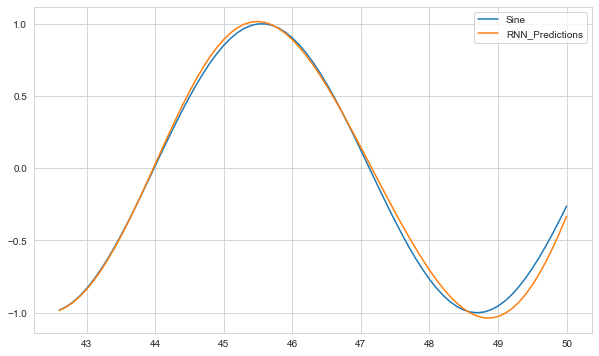

In [76]:
test.plot();

# mavi olmasi gereken
# turuncu prediction

# Modelling with LSTM

In [77]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 100, activation = "tanh", input_shape = (length, n_features))) #SRNN yerine LSTM yazdik sadece

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
# 4 gate oldugundan 4 kati artti #ilki 10300 idi

In [80]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

## Early Stopping and Validation Generator

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [83]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)
# test datamı da modelimin kabul edeceği formata ceviriyorum.
# data ve target olarak test datasini verdik

In [84]:
len(validation_generator)     #75-64 = 11, son 64 ü kullanamiyor.
# train datamızda 75 datamız vardı. 75-64 = 11 tanesi validation'a ayrılmış oldu.
# dolayısıyla length'e vereceğimiz değer testten kısa olmalı ki validation için data kalsın

11

In [85]:
# 0.15 almammizin sebebi length den yüksek deger olmali.
#length =64 idi.

In [86]:
validation_generator[0]

(array([[[8.85188786e-03],
         [2.06592891e-02],
         [3.72560954e-02],
         [5.84764771e-02],
         [8.41084070e-02],
         [1.13895779e-01],
         [1.47540969e-01],
         [1.84707803e-01],
         [2.25024924e-01],
         [2.68089497e-01],
         [3.13471233e-01],
         [3.60716695e-01],
         [4.09353821e-01],
         [4.58896644e-01],
         [5.08850150e-01],
         [5.58715219e-01],
         [6.07993616e-01],
         [6.56192968e-01],
         [7.02831682e-01],
         [7.47443761e-01],
         [7.89583454e-01],
         [8.28829716e-01],
         [8.64790412e-01],
         [8.97106234e-01],
         [9.25454293e-01],
         [9.49551344e-01],
         [9.69156618e-01],
         [9.84074225e-01],
         [9.94155114e-01],
         [9.99298559e-01],
         [9.99453170e-01],
         [9.94617400e-01],
         [9.84839568e-01],
         [9.70217371e-01],
         [9.50896908e-01],
         [9.27071224e-01],
         [8.98978376e-01],
 

In [87]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

Epoch 1/20
362/362 [==============================] - 10s 20ms/step - loss: 0.0061 - val_loss: 6.0921e-06
Epoch 2/20
362/362 [==============================] - 5s 14ms/step - loss: 6.2013e-04 - val_loss: 1.0629e-04
Epoch 3/20
362/362 [==============================] - 5s 14ms/step - loss: 1.3651e-04 - val_loss: 2.4613e-06
Epoch 4/20
362/362 [==============================] - 5s 14ms/step - loss: 1.5648e-04 - val_loss: 9.5706e-05
Epoch 5/20
362/362 [==============================] - 5s 14ms/step - loss: 1.3988e-04 - val_loss: 2.5131e-05


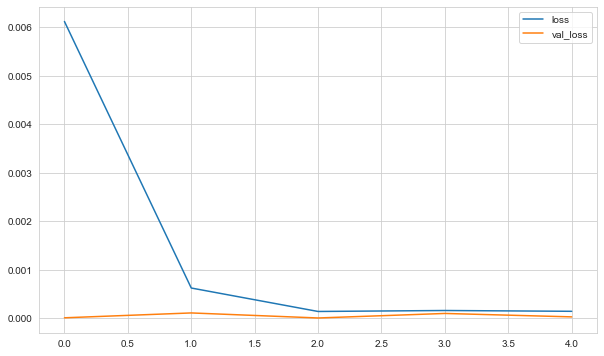

In [88]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# Evaluation on Test Data

In [89]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 18ms/step


## Inverse Transformation and Comparing

In [90]:
predictions = scaler.inverse_transform(predictions_scaled)
test['LSTM Predictions'] = predictions
test

,Sine,RNN_Predictions,LSTM Predictions
42.600,-0.982,-0.984,-0.965
42.700,-0.959,-0.961,-0.940
42.800,-0.925,-0.929,-0.904
42.900,-0.883,-0.887,-0.859
43.000,-0.832,-0.837,-0.806
...,...,...,...
49.600,-0.617,-0.732,-0.614
49.700,-0.536,-0.645,-0.495
49.800,-0.449,-0.549,-0.371
49.900,-0.357,-0.444,-0.243


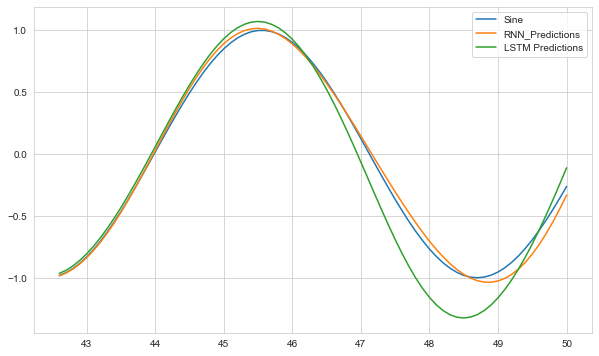

In [91]:
test.plot();

#LsTM RNN e göre daha iyi sonuc vermis gibi.

# Retrain and Forecasting

In [92]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [93]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [94]:
model = Sequential()
model.add(LSTM(100, input_shape = (length, n_features)))# LSTM final model olarak 
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6) #yukardaki modelden 4 ya da 5 epoch bana yterli old. epochs = 6 aldik.

Epoch 1/6
437/437 [==============================] - 8s 14ms/step - loss: 0.0079
Epoch 2/6
437/437 [==============================] - 6s 14ms/step - loss: 3.1630e-04
Epoch 3/6
437/437 [==============================] - 6s 14ms/step - loss: 3.2749e-04
Epoch 4/6
437/437 [==============================] - 6s 14ms/step - loss: 2.2327e-04
Epoch 5/6
437/437 [==============================] - 6s 14ms/step - loss: 1.8949e-04
Epoch 6/6
437/437 [==============================] - 6s 14ms/step - loss: 4.6183e-05


In [95]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 19ms/step


In [96]:
forecast = scaler.inverse_transform(forecast)

In [97]:
forecast

array([[-0.1837158 ],
       [-0.08512615],
       [ 0.01404308],
       [ 0.11303952],
       [ 0.21104689],
       [ 0.30719866],
       [ 0.40059875],
       [ 0.49034391],
       [ 0.57554043],
       [ 0.65532001],
       [ 0.72885725],
       [ 0.7953811 ],
       [ 0.85418848],
       [ 0.90465759],
       [ 0.94625677],
       [ 0.97855162],
       [ 1.00120967],
       [ 1.01400239],
       [ 1.01680498],
       [ 1.00959669],
       [ 0.99245286],
       [ 0.9655442 ],
       [ 0.92912951],
       [ 0.88355247],
       [ 0.8292371 ],
       [ 0.76668229],
       [ 0.69646155],
       [ 0.61921884],
       [ 0.53566918],
       [ 0.44659361],
       [ 0.35283972],
       [ 0.25531908],
       [ 0.15500014],
       [ 0.052905  ],
       [-0.04990194],
       [-0.15232413],
       [-0.25324912],
       [-0.35156417],
       [-0.44617613],
       [-0.53603111],
       [-0.62013518],
       [-0.69757312],
       [-0.76752594],
       [-0.82928253],
       [-0.88225105],
       [-0

In [98]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


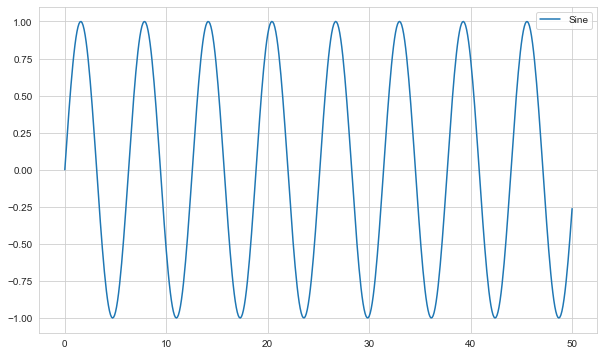

In [99]:
df.plot();

#grafigin sonuna forecast ekleyecegiz.

In [100]:
forecast_len = len(forecast)
forecast_len

64

In [101]:
step = 0.1

In [102]:
forecast_len * step

6.4

In [103]:
forecast_index = np.arange(50.1, 56.5, step = step)

# Yeni tahminlermiz icin indexlerimizi önceki df in devami olacak sekilde olusturduk.

In [104]:
len(forecast_index)

64

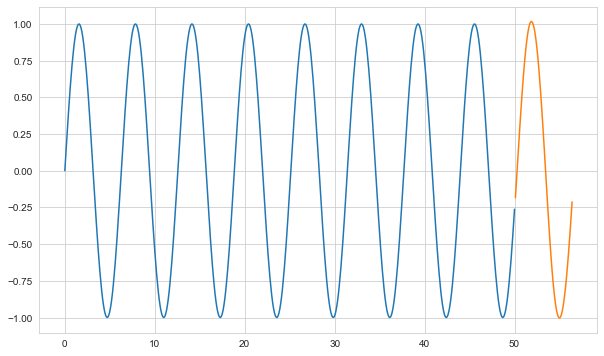

In [105]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast);

# ilk df imiz ile forecast lerimizi beraber plotladik.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___